
1. What is our independent variable? What is our dependent variable?

2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!



In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
from ggplot import *

df = pd.read_csv('/Users/mike/PycharmProject/stroop_data_py/stroopdata.csv')

print df.describe()

x = df['Congruent']
y = df['Incongruent']

In [33]:
m,s =df.mean(), df.std()

mu, sigma = m.Congruent, s.Congruent # mean and standard deviation

print df.std()

# mu, sigma = 0, 0.1 # mean and standard deviation

Congruent      3.559358
Incongruent    4.797057
dtype: float64


In [34]:
s = np.random.normal(25)

print abs(mu - np.mean(s)) < 0.01

False


In [35]:
import pandas as pd
import numpy as np

stroop = pd.read_csv('stroopdata.csv')
# Difference is created by Incongruent - Congruent so that no negative value appears
stroop['difference'] = stroop.Incongruent - stroop.Congruent

print '### Descriptive statistics ###'
print stroop.describe()
print ''
print '### Standard error of the mean ###'
print stroop.std() / np.sqrt(stroop.count())

### Descriptive statistics ###
       Congruent  Incongruent  difference
count  24.000000    24.000000   24.000000
mean   14.051125    22.015917    7.964792
std     3.559358     4.797057    4.864827
min     8.630000    15.687000    1.950000
25%    11.895250    18.716750    3.645500
50%    14.356500    21.017500    7.666500
75%    16.200750    24.051500   10.258500
max    22.328000    35.255000   21.919000

### Standard error of the mean ###
Congruent      0.726551
Incongruent    0.979195
difference     0.993029
dtype: float64


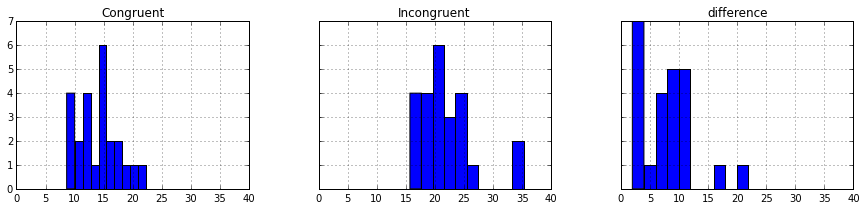

In [36]:
%matplotlib inline 
_ = stroop.hist(sharex=True, sharey=True, figsize=(15, 3), layout=(1, 3))

In [37]:
from scipy import stats

# Paired t-test (manual)
SE = stroop.difference.std() / np.sqrt(stroop.difference.count())
t1 = stroop.difference.mean() / SE

print "T-statistics manually computed is {}".format(t1)

# Paired t-test (scipy)
t2, p2 = stats.ttest_rel(stroop.Incongruent, stroop.Congruent)

print "T-statistics computed by scipy.stats is {}".format(t2)
print "P-value based on the t-statistics is {}".format(p2)

T-statistics manually computed is 8.02070694411
T-statistics computed by scipy.stats is 8.02070694411
P-value based on the t-statistics is 4.10300058571e-08


In [38]:
'''
Confidence level = 0.95
'''

def mean_confidence_interval(data, confidence=0.95):
    # a = data
    # m, se = np.mean(a), scipy.stats.sem(a)
    # low, high = scipy.stats.norm.interval(confidence, m, se)
    # h1 = high - m
    # h2 = m - low
    
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

    if h1 - h2 != 0.:
        print 'Something went wrong'
        print '{} and {} should be identical distances from mean {}..'.format(h1, h2, m)
    else:
        return h1
print mean_confidence_interval(stroop)

(14.67727777777778, array([ 13.17429273,  12.65165821,  12.62304154]), array([ 16.18026283,  16.70289735,  16.73151402]))


In [46]:
from scipy import stats

def printScores(scores):
    # a = data
    # m, se = np.mean(a), scipy.stats.sem(a)
    scores_sd = scores.std()
    print scores_sd
    scores_mean = scores.mean()
    # Assuming a normal distribution...
    scores_mean_ci = stats.norm.interval(0.05, loc=scores_mean, scale=scores_sd)

    print("-------- ")
    # print("Mean: " + str(round(scores_mean, 3)))
    # print("Standard dev: " + str(round(scores_sd, 3)))
    # print("95% confidence interval: " + str(round(scores_mean_ci[0], 3)) + " -> " + str(round(scores_mean_ci[1], 3)))

printScores(stroop)

Congruent      3.559358
Incongruent    4.797057
difference     4.864827
dtype: float64
-------- 


To start paired t-test, let's set the significance level as 0.01 which is reletively conservative.
So the critical value of t-statistics is 2.50 according to t-table. (Look up a cell where p=0.01 and df=23)
The null hypothesis Mc=Mi can be described as Mi−Mc=0 which is equivalent to Md=0.
As computed in the previous section, the mean of difference is 7.96 and standard error of the mean of difference is 0.99.
Md=7.96
SEd=0.99
Plug in those numbers to the formula : t-statistics = Mean / Standard Error
t-statistics = 7.96 / 0.99 = 8.02
The number matches the one in python code above. (Not round-off numbers are used for computation.)
Since the t-statistics is much bigger than the critical value 2.50, the null hypothesis is rejected.
(According to scipy library, the p-value is actually 4.10-e08 and this is much less than the significance level set at the beginning.)
As a result, we can say that the delay of reaction time in Incongruent condition is statistically significant on a given data set. In other words, Stroop effect is statistically significant.
6. Impression
The delay of reaction time in Incongruent condition seems to be a certain type of cognitive bias which human being cannot avoid as we learn things. Wikipedia says that this is due to attentional bias. Dot-probe paradigm and dichotic listening are considered as similar tasks as written in the Wikipedia page.

In [49]:
from scipy.stats import levene
print levene(stroop.Congruent, stroop.Incongruent)

from scipy.stats import kstest
print 'ks_con', kstest(stroop.Congruent, 'norm')
print 'ks_inc', kstest(stroop.Incongruent, 'norm')

from scipy.stats import ks_2samp
ks_2samp(stroop.Congruent, stroop.Incongruent)
# Do the t-test
import scipy.stats as ss
print ss.ttest_ind(stroop.Congruent, stroop.Incongruent)

LeveneResult(statistic=0.2502499448677214, pvalue=0.61928406991282192)
ks_con KstestResult(statistic=1.0, pvalue=0.0)
ks_inc KstestResult(statistic=1.0, pvalue=0.0)
Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)
